In [ ]:
!pip install mne
!pip install matplotlib
!pip install scipy


In [5]:
from pathlib import Path
import mne
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, ttest_rel

# Plot 1 - Comparing early visual response to images and words in the occipital channels

Information:
- One participant
- EEG FaceWord data
- t-test comparing the response to images and words
    - Channels O1, Oz and O2 
    - Time window 0.1 - 0.2 ms after stimuli onset


Run the chunks below to load the data, conduct the statistical test and create the plot!

In [11]:
# CODE FOR LOADING IN THE DATA (already preprocessed and epoched)
data_path =  Path("/Users/au661930/work/EEG_lab/example_data") #Path("/work/EEG_lab/example_data")

epochs = mne.read_epochs(data_path / f"Group1-epo.fif", verbose=False, preload=True)

# only keep eeg channels (making sure not to include EOG and stim channels)
epochs.pick(["eeg"])

<EpochsFIF | 240 events (all good), -0.2 – 0.496 s (baseline -0.2 – 0 s), ~9.0 MB, data loaded,
 'Word/wPos': 20
 'Wait/wPos': 20
 'Image/wPos': 20
 'Word/wNeg': 20
 'Wait/wNeg': 20
 'Image/wNeg': 20
 'Word/wNeu': 20
 'Wait/wNeu/iPos': 12
 'Image/wNeu/iPos': 12
 'Wait/wNeu/iNeg': 8
 and 7 more events ...>

In [12]:
# CODE FOR CONDUCTING T-TEST
# extracting the data for words and images
epochs_word = epochs["Word"] 
epochs_image = epochs["Image"] 

# picks of channels and time points to use for the t-test
picks = ["O1", "Oz", "O2"]

# time window in seconds
tmin, tmax = 0.1, 0.2

# extract the data for the time window and channels
data_word = epochs_word.get_data(picks = picks, tmin = tmin, tmax = tmax)
data_image = epochs_image.get_data(picks = picks, tmin = tmin, tmax = tmax)


# the shape of the data is (number of trials, number of channels, number of time points)
print(data_word.shape) 
print(data_image.shape)

# average over time points and channels to get a single value for each trial
data_ttest_word = data_word.mean(axis = (1, 2))
data_ttest_image = data_image.mean(axis = (1, 2))

# conduct the t-test
ttest_ind(data_ttest_word, data_ttest_image)

(60, 3, 25)
(60, 3, 25)


TtestResult(statistic=np.float64(-0.3118441408627894), pvalue=np.float64(0.7557093047688821), df=np.float64(118.0))

/var/folders/4z/m7s435qs4bg13rtf3k29jn6s1p_fmr/T/ipykernel_65944/680209489.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


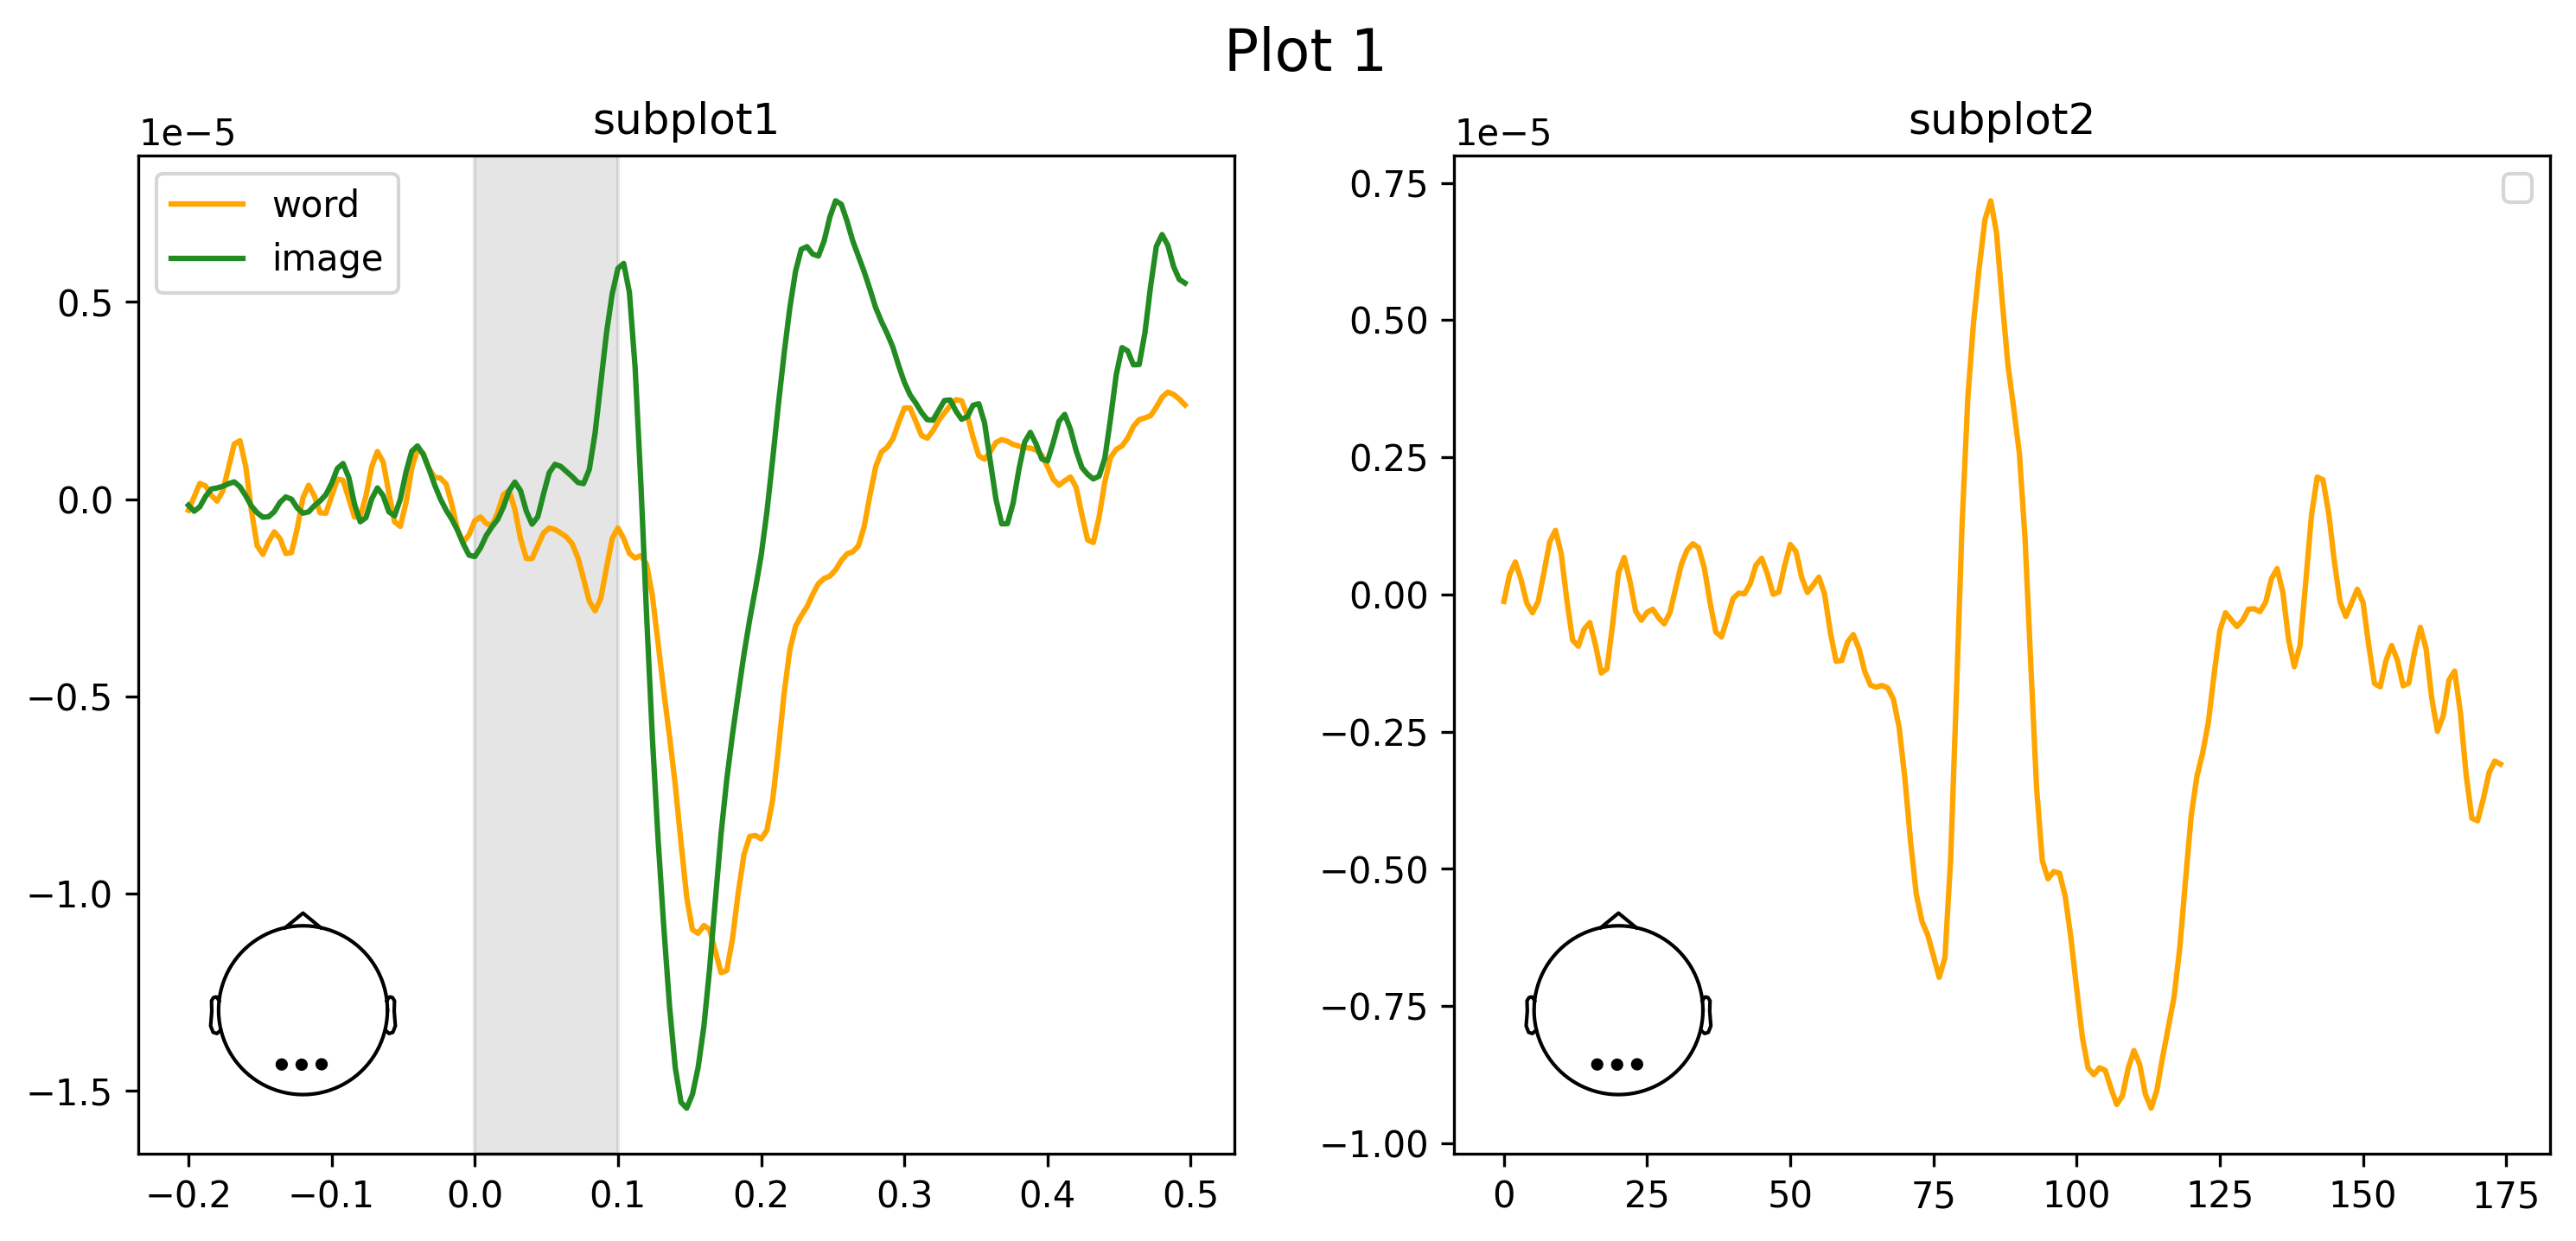

In [64]:
# CODE FOR PLOTTING THE DATA
n_rows, n_cols = 1, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5), dpi=300)


# extract the data for plotting (from specific channels, but all time points as we might want to plot the whole trial time course and not just a specific time window)
data_word_plot = epochs_word.get_data(picks = picks)
data_image_plot = epochs_image.get_data(picks = picks)

# getting the time stamps for each sample
times = epochs.times

# simple plot averaging over all trials
data_word_plot_avg = data_word_plot.mean(axis = (0, 1)).squeeze()
axes[0].plot(times, data_word_plot_avg, label = "word", color = "orange")

data_image_plot_avg = data_image_plot.mean(axis = (0, 1))
axes[0].plot(times, data_image_plot_avg, label = "image", color = "forestgreen")

# STANDARD ERROR OF THE MEAN
# average over channels
#data_word_plot_avg_ch = data_word_plot.mean(axis = 1)
#data_image_plot_avg_ch = data_image_plot.mean(axis = 1)
#data_word_plot_sem = data_word_plot_avg_ch.std(axis = 0) / np.sqrt(data_word_plot.shape[0])
#data_image_plot_sem = data_image_plot_avg_ch.std(axis = 0) / np.sqrt(data_image_plot.shape[0])

# squeeze the data to get rid of the channel dimension
#data_word_plot_sem = np.squeeze(data_word_plot_sem)
#data_image_plot_sem = np.squeeze(data_image_plot_sem)


#axes[0].fill_between(times, data_word_plot_avg - data_word_plot_sem, data_word_plot_avg + data_word_plot_sem, alpha = 0.2, color = "orange")
#axes[0].fill_between(times, data_image_plot_avg - data_image_plot_sem, data_image_plot_avg + data_image_plot_sem, alpha = 0.2, color = "forestgreen")


# SHADED AREA
axes[0].axvspan(0, 0.1, color='gray', alpha=0.2)

axes[0].legend()

# PLOTTING DIFFERENCE
difference = data_word_plot_avg - data_image_plot_avg

axes[1].plot(difference, label = "", color = "orange")
axes[1].legend()



# TITLE AND LABELS
axes[0].set_title("subplot1")
axes[0].set_xlabel("")
axes[0].set_ylabel("")

axes[1].set_title("subplot2")
axes[1].set_xlabel("")
axes[1].set_ylabel("")

fig.suptitle("Plot 1", fontsize=16)

# POSITION OF THE SENSORS
ax_sensors = [axes[0].inset_axes([0.05, 0.05, 0.2, 0.2]), axes[1].inset_axes([0.05, 0.05, 0.2, 0.2])]
for ax_sens in ax_sensors:
    mne.viz.plot_sensors(epochs.info, show_names=False, axes=ax_sens, show=False, pointsize=2)

plt.savefig(Path("fig/plot1.png"))

## Modify the plot
**Task:** Modify the plot to help guide the reader of the paper towards what is relevant for the statisical test and make it as informative as possible!


In [ ]:
# insert your code here!

# Plot 1 - Comparing early visual response to images and words in the occipital channels with **multiple participants**

Information:
- Three participants
- EEG FaceWord data
- t-test comparing the response to images and words
    - Channels O1, Oz and O2 
    - Time window 0.1 - 0.2 ms after stimuli onset


Run the chunks below to load the data, conduct the statistical test and create the plot!

In [67]:
# LOAD IN THE DATA
all_epochs = [] # create an empty list to store the epochs objects for all participants

picks = ["O1", "Oz", "O2"]

for participant in ["Group1", "Group5", "Group6"]:
    epochs = mne.read_epochs(data_path / f"{participant}-epo.fif", verbose=False, preload=True)

    # only keep wanted channels
    epochs.pick(picks)

    all_epochs.append(epochs)


print(type(all_epochs)) # we have now created a list of epochs objects
print(len(all_epochs)) # we have 3 epochs objects in the list
print(type(all_epochs[0])) # we can access the first epochs object in the list which is a Epochs object

<class 'list'>
3
<class 'mne.epochs.EpochsFIF'>


In [68]:
# CODE FOR STATISTICAL test

# create empty arrays to store the data 
word = np.array([])
image = np.array([])

for epochs in all_epochs: # loop over the list with epochs for each participant

    # extract the trials you are interested in
    epochs1 = epochs["Word"]
    epochs2 = epochs["Image"]

    # extract the data for the time window and channels of interest
    data1= epochs1.get_data(picks = picks, tmin = tmin, tmax = tmax)
    data2 = epochs2.get_data(picks = picks, tmin = tmin, tmax = tmax)

    # calculate the mean over the time, channel and trial dimension (axis 0, 1 and 2)
    data1_mean = np.mean(data1, axis=(0, 1, 2))
    data2_mean = np.mean(data2, axis=(0, 1, 2))

    # append the data to the arrays
    word = np.append(word, data1_mean)
    image = np.append(image, data2_mean)

print(word)
print(image)

# now using paired t-test as we have an average value for each participant in both conditions
ttest_rel(word, image)

[-7.08230864e-06 -4.33707991e-06 -2.76342117e-06]
[-6.65635744e-06 -4.72180027e-06 -5.17024915e-06]


TtestResult(statistic=np.float64(0.9361547827207205), pvalue=np.float64(0.4480190442834888), df=np.int64(2))

In [73]:
# EXTRACTING THE DATA FOR PLOTTING

# create empty arrays to store the data 
word_plot = []
image_plot = []

for epochs in all_epochs: # loop over the list with epochs for each participant

    # extract the trials you are interested in
    epochs1 = epochs["Word"]
    epochs2 = epochs["Image"]

    # extract the data for the time window and channels of interest and average over the channels
    data1= epochs1.get_data().mean(axis = 1)
    data2 = epochs2.get_data().mean(axis = 1)

    # append the data to the arrays
    word_plot.append(data1)
    image_plot.append(data2)


# we now have a list of arrays with the data for each participant
print(type(word_plot)) # we have now created a list of arrays
print(len(word_plot)) # we have 3 array objects in the list
print(type(word_plot[0])) # we can access the first array object in the list which is a numpy array
print(word_plot[0].shape) # the shape of the array is (number of trials, number of channels, number of time points)

<class 'list'>
3
<class 'numpy.ndarray'>
(60, 175)


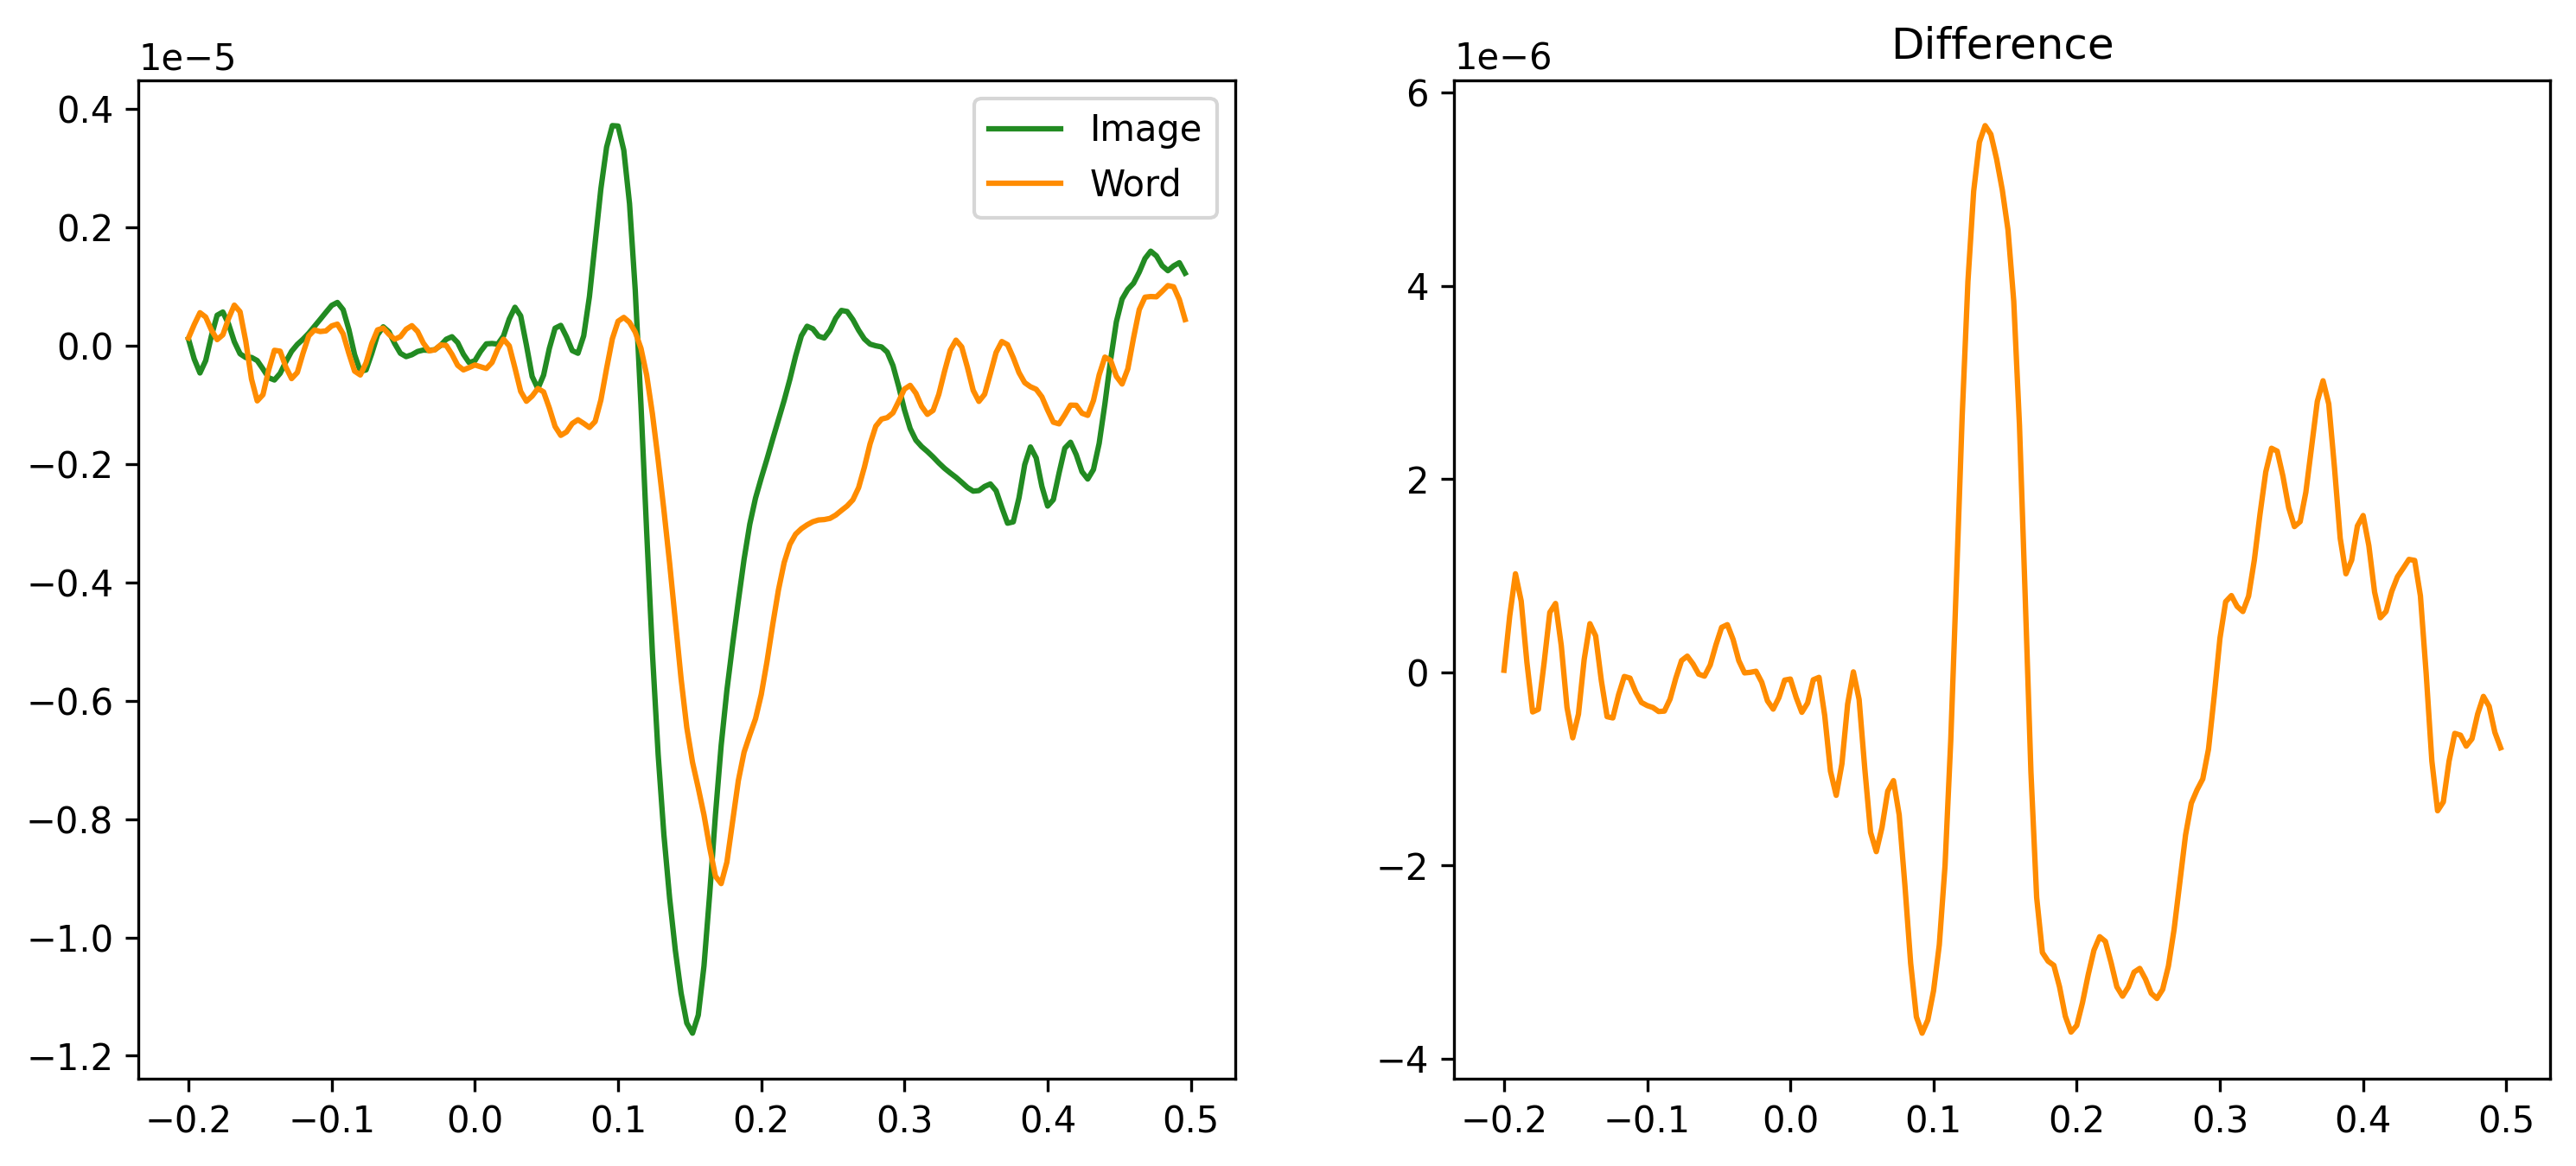

In [82]:
# CODE FOR PLOTTING
n_rows, n_cols = 1, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5), dpi=300)

# stack average for each particpant so shape =  (participants, timepoints )
participants = range(len(all_epochs))
group_lvl_img = np.stack([image_plot[participant].mean(axis = 0) for participant in participants])
group_lvl_word = np.stack([word_plot[participant].mean(axis = 0) for participant in participants])

# average over participants
avg_group_lvl_img = group_lvl_img.mean(axis=0)
avg_group_lvl_word = group_lvl_word.mean(axis=0)

axes[0].plot(times, avg_group_lvl_img, color = "forestgreen", label = "Image")
axes[0].plot(times, avg_group_lvl_word, color = "darkorange", label = "Word")

axes[0].set_title("")
axes[0].legend()


# PLOT DIFFERENCE
difference = avg_group_lvl_word - avg_group_lvl_img
axes[1].plot(times, difference, color = "darkorange")

axes[1].set_title("Difference")


plt.savefig(Path("fig/plot2.png"))

## Modify the plot
**Task:** Modify the plot to help guide the reader towards what is relevant for the statisical test and make it as informative as possible!


In [81]:
# insert your code here

# Plot 3 - fMRI 

TBD